[View in Colaboratory](https://colab.research.google.com/github/moyoyomiyazawa/practice/blob/master/mnist_ipynb.ipynb)

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
# 入力画像の大きさ(行と列)
img_rows, img_cols = 28, 28

In [0]:
# 学習データとテストデータに分割したデータ
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# backendがTensorFlowとTheanoで配列のshapeが異なるために2パターン記述
if K.image_data_format() == 'channels_first':
    # 1次元配列に変換
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # 1次元配列に変換
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
# 入力データ[0, 1]の範囲に正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# ラベルをバイナリベクトルとして扱う
# Kerasはラベルを数値ではなく、0 or 1を要素に持つベクトルで扱うため

"""
例えば、サンプルに対するターゲットが「5」の場合、次のような形になります。
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
"""
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# CNNネットワークの構築
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
# 損失関数、最適化関数、評価指標を指定してモデルをコンパイル
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [0]:
# モデルの学習
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 196us/step - loss: 0.2664 - acc: 0.9189 - val_loss: 0.0603 - val_acc: 0.9799
Epoch 2/12
60000/60000 [==============================] - 10s 161us/step - loss: 0.0881 - acc: 0.9736 - val_loss: 0.0412 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0673 - acc: 0.9794 - val_loss: 0.0351 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 10s 161us/step - loss: 0.0545 - acc: 0.9833 - val_loss: 0.0300 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0481 - acc: 0.9852 - val_loss: 0.0328 - val_acc: 0.9888
Epoch 6/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0305 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.0376 - acc: 0.9887 - val_loss: 0.

In [0]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026577823844922476
Test accuracy: 0.9927


In [0]:
# 学習済みモデルの保存
model.save('model.h5')

hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('model.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0263 - acc: 0.9922 - val_loss: 0.0245 - val_acc: 0.9917
Epoch 2/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0238 - acc: 0.9931 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 3/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0244 - acc: 0.9919 - val_loss: 0.0256 - val_acc: 0.9917
Epoch 4/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0274 - val_acc: 0.9921
Epoch 5/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0230 - acc: 0.9929 - val_loss: 0.0269 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0224 - acc: 0.9934 - val_loss: 0.0266 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0208 - acc: 0.9935 - val_loss: 0.

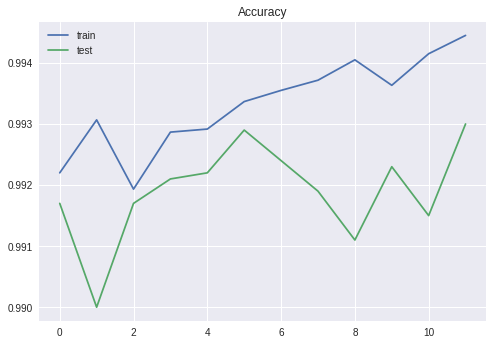

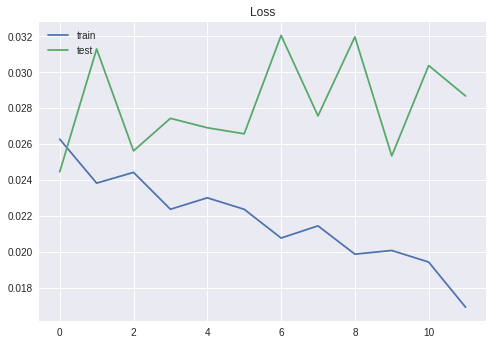

In [0]:
import matplotlib.pyplot as plt
# 学習をグラフ化(正解率)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 学習をグラフ化(正解率)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()